## 실습 1
- ‘pattern.png’ 영상에 대해 erosion, opening, dilation, closing 등 을 수행하여 다음 장의 그림과 유사한 결과를 얻음
- 반경이 8인 disk(15,15)를 structuring element로 사용

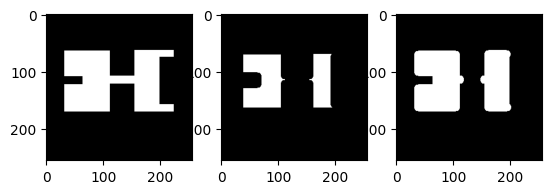

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt

gray = cv.imread('/content/Pattern from HUFS.png')
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE,(15,15))
dilation = cv.erode(gray, kernel, iterations = 1)
closing = cv.morphologyEx(gray, cv.MORPH_OPEN, kernel)

plt.subplot(1,3,1)
plt.imshow(gray)

plt.subplot(1,3,2)
plt.imshow(dilation)

plt.subplot(1,3,3)
plt.imshow(closing)
plt.show()

## 실습 2

- 다음쪽 그림에 있는 영상 처리 과정을 시현함
- 영상 ‘0907.png’를 사용
- Structuring element의 모양을 ‘cv.MORPH_CROSS’ (3x3)로 해야 함
- Dilation을 수행하여 그림 (b)를 얻음
- 그림 (a), (b)를 display 하여 다음 쪽 그림과 비교해 봄

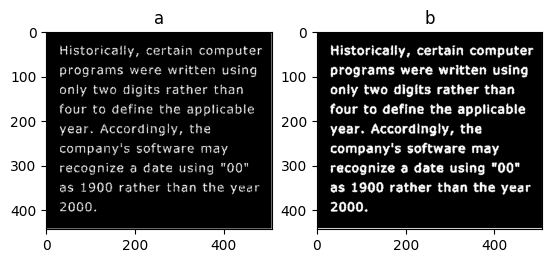

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt

gray = cv.imread('/content/Hufs eClass 0907.png', cv.IMREAD_GRAYSCALE)
kernel = cv.getStructuringElement(cv.MORPH_CROSS, (3,3))
dilation = cv.dilate(gray, kernel, iterations = 1)

plt.subplot(1,2,1)
plt.imshow(cv.cvtColor(gray, cv.COLOR_BGR2RGB))
plt.title('a')

plt.subplot(1,2,2)
plt.imshow(cv.cvtColor(dilation, cv.COLOR_BGR2RGB))
plt.title('b')
plt.show()


## 실습 3

- 다음쪽 그림이 있는 지문 영상 처리과정을 시현함
- ‘0911.png’ 파일을 입력으로 사용
- Structuring element를 3x3 square로 설정 (cv.MORPH_RECT)
- Erosion-Dilation-Dilation-Erosion (또는 opening-closing)을 반복하여 그림 e를 얻음
- 그림 a,c,e 를 display 하여 다음쪽 그림과 비교해봄

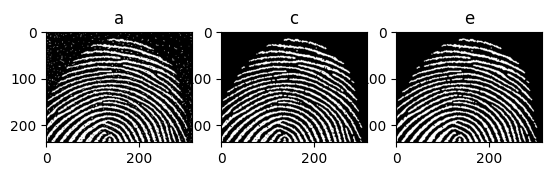

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt

gray = cv.imread('/content/Hufs eClass 0911.png', cv.IMREAD_GRAYSCALE)
kernel = cv.getStructuringElement(cv.MORPH_CROSS, (3,3))

opening = cv.morphologyEx(gray, cv.MORPH_OPEN, kernel)
closing = cv.morphologyEx(opening, cv.MORPH_CLOSE, kernel)

plt.subplot(1,3,1)
plt.imshow(gray, cmap='gray')
plt.title('a')

plt.subplot(1,3,2)
plt.imshow(opening, cmap='gray')
plt.title('c')

plt.subplot(1,3,3)
plt.imshow(closing, cmap='gray')
plt.title('e')

plt.show()


## 실습 4

- 다음 그림과 같은 결과를 얻을 수 있도록 경계 추출 프로그램을 작성함
- ‘0914.png’를 입력 영상으로 사용
- 3x3 rectangle을 structuring element로 하여 erosion을 수행.
- Original 영상에서 erosion 결과를 빼서 결과를 얻음

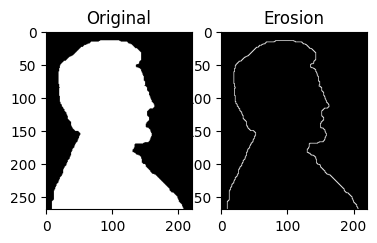

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt

gray = cv.imread('/content/Hufs eClass 0914.png', cv.IMREAD_GRAYSCALE)
kernel = cv.getStructuringElement(cv.MORPH_RECT, (3,3))
erosion = cv.erode(gray, kernel, iterations = 1)
result = cv.subtract(gray, erosion)

plt.subplot(1,3,1)
plt.imshow(gray, cmap='gray')
plt.title('Original')

plt.subplot(1,3,2)
plt.imshow(result, cmap='gray')
plt.title('Erosion')

plt.show()


## 과제 3

1. Sobel 에지 검출
- 본인이 촬영한 영상(크기를 800x800 이하로 조절)에 Sobel 에지 검출을 수행하고 소스 코드와 결과 영상을 제시.
- 수평과 수직방향 에지 검출 결과와 gradient magnitude로 결합한 결과 영상을 제시

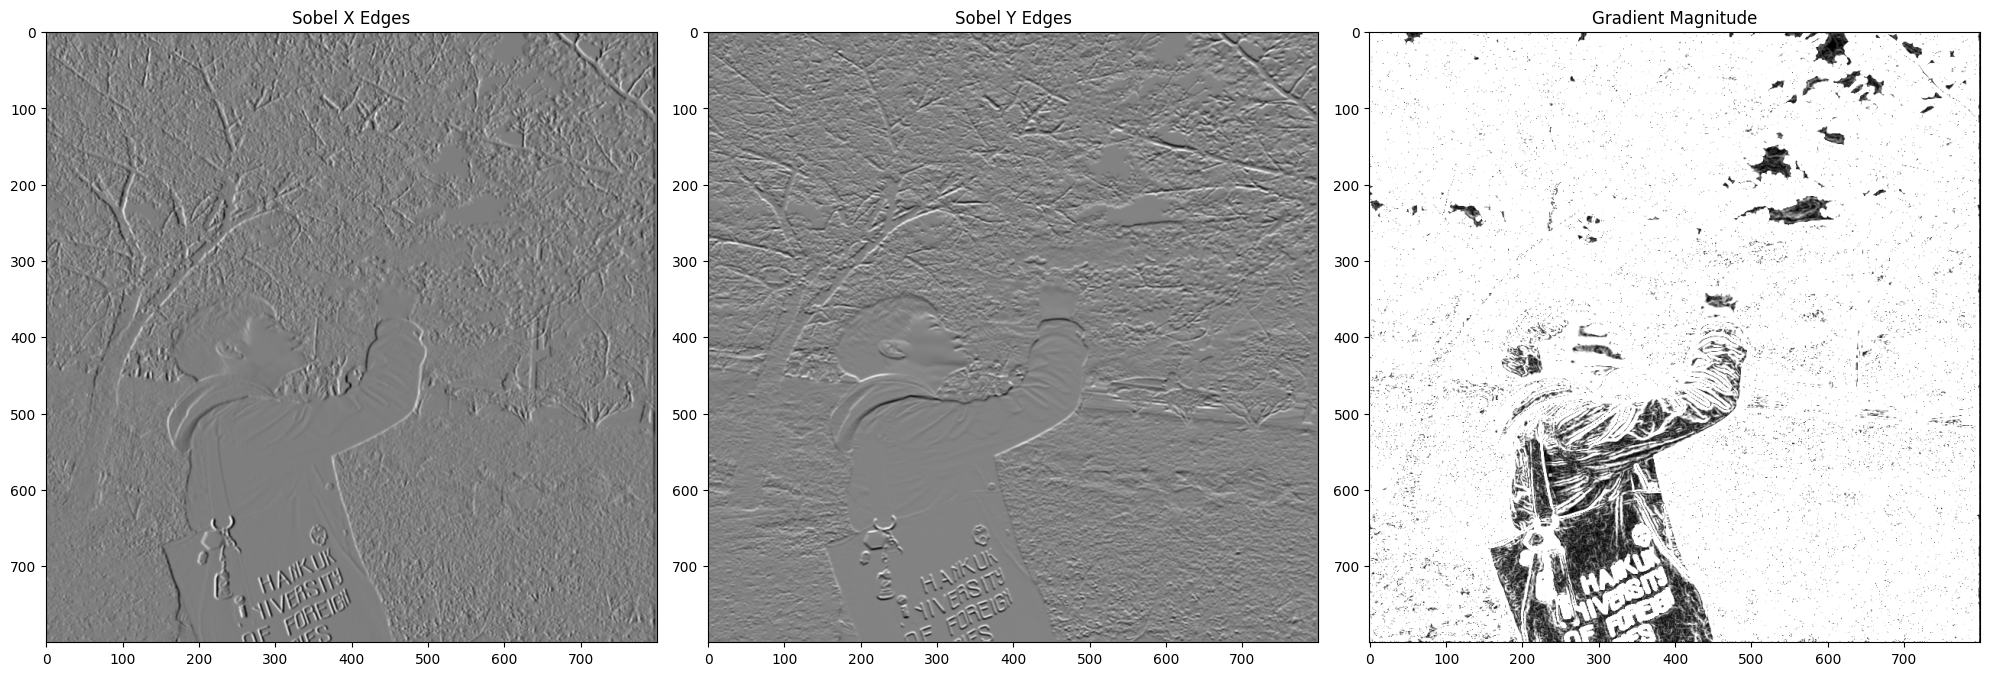

In [ ]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

# 이미지를 읽어옵니다.
img = cv.imread('/content/Lab3_testpict.jpeg')

# 이미지 크기를 800x800으로 조절합니다.
resized_img = cv.resize(img, (800, 800))

# 조절된 이미지를 그레이스케일로 변환합니다.
gray = cv.cvtColor(resized_img, cv.COLOR_BGR2GRAY)

# Sobel 연산자를 사용하여 수평 방향(x 방향)과 수직 방향(y 방향)의 에지를 검출합니다.
x_edges = cv.Sobel(gray, cv.CV_64F, 1, 0, ksize=5)
y_edges = cv.Sobel(gray, cv.CV_64F, 0, 1, ksize=5)

# 그래디언트 크기를 계산하고 0에서 255 사이로 제한합니다.
magnitude = cv.magnitude(x_edges, y_edges)
magnitude = np.clip(magnitude, 0, 255).astype(np.uint8)

# 에지 검출 결과와 그래디언트 크기 결합한 결과를 시각화합니다.
plt.figure(figsize=(20, 10))

plt.subplot(1, 3, 1)
plt.imshow(x_edges, cmap='gray')
plt.title('Sobel X Edges')

plt.subplot(1, 3, 2)
plt.imshow(y_edges, cmap='gray')
plt.title('Sobel Y Edges')

plt.subplot(1, 3, 3)
plt.imshow(magnitude, cmap='gray')
plt.title('Gradient Magnitude')

plt.tight_layout()
plt.show()


2. Canny 에지 검출
- 1번 영상에 대해 s = 1, 3, 5, 7로 변화시킨 Canny 에지 검출 을 수행하고 소스 코드와 결과 영상을 제시.
- Threshold를 적 절히 조절. s 를 조절하는 경우 Canny 함수를 호출하기 전에 Gaussian convolution을 먼저 해야 함

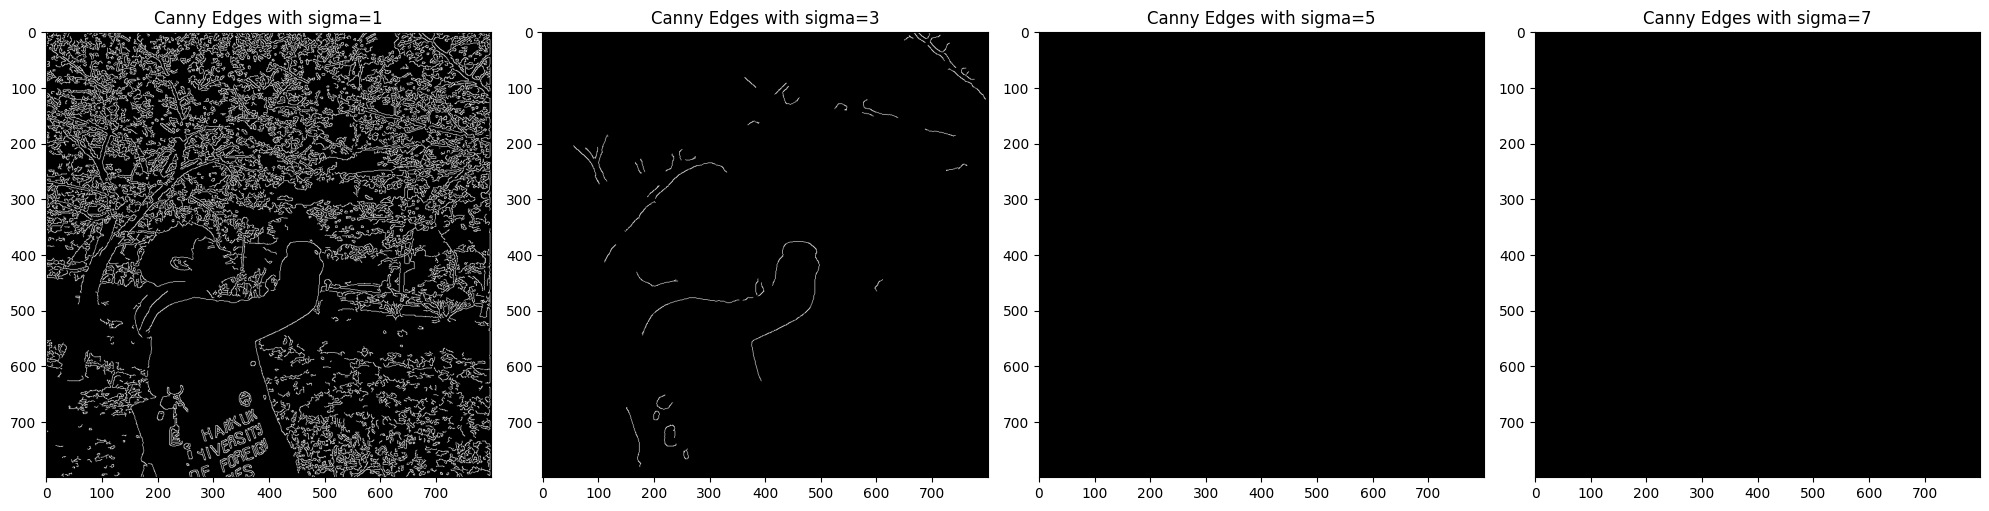

In [ ]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

# 이미지를 읽어옵니다.
img = cv.imread('/content/Lab3_testpict.jpeg')

# 이미지 크기를 800x800으로 조절합니다.
resized_img = cv.resize(img, (800, 800))

# 조절된 이미지를 그레이스케일로 변환합니다.
gray = cv.cvtColor(resized_img, cv.COLOR_BGR2GRAY)

sigma1 = 1
sigma3 = 3
sigma5 = 5
sigma7 = 7

w1 = 6*sigma1+1
w3 = 6*sigma3+1
w5 = 6*sigma5+1
w7 = 6*sigma7+1

# sigma가 1, 3, 5, 7일 때의 가우시안 블러 적용
blurred1 = cv.GaussianBlur(gray, (w1, w1), 1)
blurred3 = cv.GaussianBlur(gray, (w3, w3), 3)
blurred5 = cv.GaussianBlur(gray, (w5, w5), 5)
blurred7 = cv.GaussianBlur(gray, (w7, w7), 7)

# 각각의 블러 처리된 이미지에 대해 Canny 에지 검출 수행
edges1 = cv.Canny(blurred1, 100, 200)  # 임계값 수정
edges3 = cv.Canny(blurred3, 100, 200)  # 임계값 수정
edges5 = cv.Canny(blurred5, 100, 200)  # 임계값 수정
edges7 = cv.Canny(blurred7, 100, 200)  # 임계값 수정


# 결과 시각화
plt.figure(figsize=(20, 5))
plt.subplot(1, 4, 1)
plt.imshow(edges1, cmap='gray')
plt.title('Canny Edges with sigma=1')

plt.subplot(1, 4, 2)
plt.imshow(edges3, cmap='gray')
plt.title('Canny Edges with sigma=3')

plt.subplot(1, 4, 3)
plt.imshow(edges5, cmap='gray')
plt.title('Canny Edges with sigma=5')

plt.subplot(1, 4, 4)
plt.imshow(edges7, cmap='gray')
plt.title('Canny Edges with sigma=7')

plt.tight_layout()
plt.show()